In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from scipy.special import boxcox1p
from scipy import stats
import re
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#Read the datafile
coursecluster =r'/gdrive/My Drive/KAEMH/newyear_newyou/CPE Course Clusters 12112019.csv'
CPE_coursecluster=pd.read_csv(coursecluster, index_col=0)

In [0]:
def display_all(df):
    """display the datafile at once.""" 
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [0]:
display_all(CPE_coursecluster)
CPE_coursecluster.shape

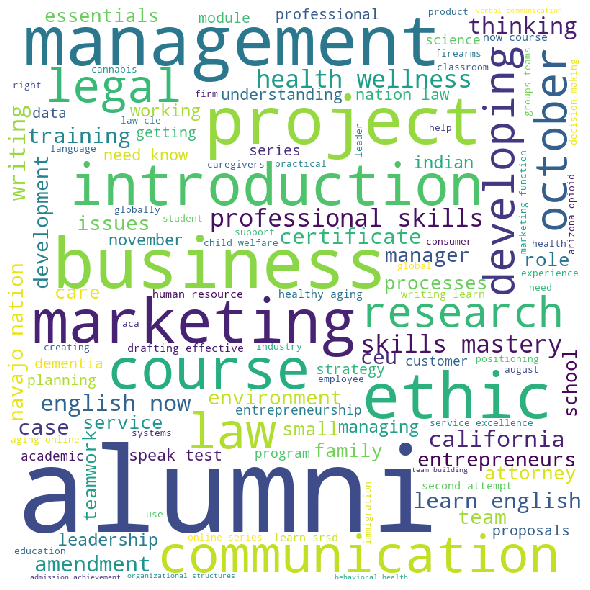

In [0]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in CPE_coursecluster['degree 1']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#find the clusters with Health

searchfor=["Health","Be the Change:","Bicycle Safety","Beekeeping","Queen Rearing","Safegaurding Brains","Handling Personal Injury","Lactation Education","Alzheimer's","Dementia"]

CPE_coursecluster[CPE_coursecluster['degree 1'].str.contains('|'.join(searchfor))]

In [0]:
#read the CPE analytics enrollment

analytics_enroll =r'/gdrive/My Drive/KAEMH/newyear_newyou/CPE_analytics_enrollments_since_2016_20191122203358.csv'
CPE_analyticsenroll=pd.read_csv(analytics_enroll)
display_all(CPE_analyticsenroll.T)

In [0]:
# convert emails to lowercase in CPE clusters

CPE_analyticsenroll['student_email']=CPE_analyticsenroll['student_email'].str.lower()
display_all(CPE_analyticsenroll)

In [0]:
CPE_analyticsenroll.rename(columns = {'student_email':'EMAIL_ADDRESS'}, inplace = True) 

CPE_analyticsenroll.head()
CPE_analyticsenroll.shape

(23958, 10)

In [0]:
#find the one who has taken heath and well ness course from CPE_analyticsenroll

CPE_healthenroll=pd.DataFrame(CPE_analyticsenroll[CPE_analyticsenroll['listing_name'].str.contains('|'.join(searchfor))])

print(CPE_healthenroll.shape)
display_all(CPE_healthenroll)

In [0]:
#rename the student_email to EMAIL_ADDRESS in CPE_healthenroll
CPE_healthenroll.rename(columns = {'student_email':'EMAIL_ADDRESS'}, inplace = True) 

CPE_healthenroll.head()
CPE_healthenroll.shape

(6814, 10)

In [0]:
#read the text file

text_raw=open('/gdrive/My Drive/KAEMH/newyear_newyou/AA_PROFILE_EXT.txt',encoding='cp1252')

In [0]:
#converting the text file AA_PROFILE_EXT.txt to a dataframe 

text_dataframe = pd.read_csv('/gdrive/My Drive/KAEMH/newyear_newyou/AA_PROFILE_EXT.txt', sep="[\t]",encoding='cp1252')
#display_all(text_dataframe)

In [0]:
#converting the email address to the lower case  for the new text_data

text_dataframe['EMAIL_ADDRESS']=text_dataframe['EMAIL_ADDRESS'].str.lower()
display_all(text_dataframe)
text_dataframe.shape

In [0]:
#filtering the text_dataframe for Degreed alumnus

degreed_alumnus=pd.DataFrame(text_dataframe[text_dataframe.isin(["Alumnus/a, Degreed"]).any(axis=1)])
print(degreed_alumnus.shape)

display_all(degreed_alumnus)

In [0]:
#total of the non-Degreed and Degreed alumnus

non_degreed_total_count=text_dataframe.isin(["Alumnus/a, Non-Degreed"]).any(axis=1).sum()
print("total of non-degreed alumnus",non_degreed_total_count.sum())

degreed_alumnus_count=text_dataframe.isin(["Alumnus/a, Degreed"]).any(axis=1).sum()
print("total of degreed alumnus",degreed_alumnus_count.sum())

total of non-degreed alumnus 172806
total of degreed alumnus 363713


In [0]:
dims = (8,10)
x=np.arange(1000,500000)
fig, ax = plt.subplots(figsize=dims)
plt.ylabel("")
sns.countplot(ax=ax,data=totalenrolls_testdata,x="Segment",palette=["#FFC627","#8c1D40","#00A3E0","#5C6670","#FF7F32"])

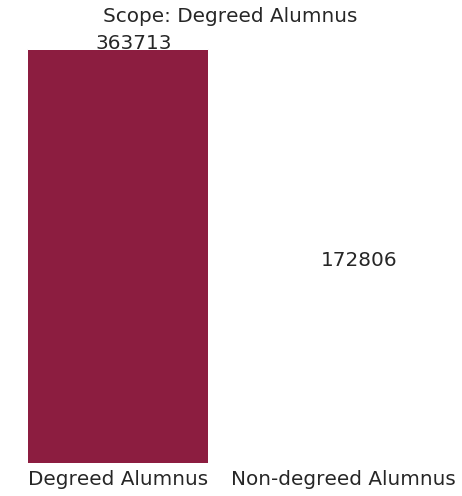

In [0]:


x=['Degreed Alumnus','Non-degreed Alumnus']
y=[degreed_alumnus_count.sum(),non_degreed_total_count.sum()]
dims = (8,8)
ind = (1,2)
width = 0.8
fig,a = plt.subplots(figsize=dims)
p1 = a.bar(x,y,color=["#8c1D40","#FFFFFF"])
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
a.xaxis.set_visible(True)
a.tick_params(labelsize=20)
a.yaxis.set_visible(False)
a.patch.set_visible(False)

#plt.xlabel('Available auidence')
plt.title("Scope: Degreed Alumnus",fontsize=20)
for i, v in enumerate(y):
    plt.text(xlocs[i] - 1.10, v + 0.01, str(v),fontsize=20)
plt.show()



In [0]:
#Append the ADVANCE_ID column to CPE_Healthsenroll based on the matching email address - to know the count of health enrolled alumnis

health_data=CPE_healthenroll.merge(degreed_alumnus,on="EMAIL_ADDRESS")

display_all(health_data)
print(health_data.shape) 

In [0]:
#Append the ADVANCE_ID column to CPE_analyticsenroll based on the matching email address - to know the count of all enrolled alumnis

enroll_data=CPE_analyticsenroll.merge(degreed_alumnus,on="EMAIL_ADDRESS")

display_all(enroll_data)
print(enroll_data.shape) 

In [0]:
#merge the CPE_analytics enroll to append the Alumni ids of degreed alumni to get all of the matching emails

final_data=degreed_alumnus.merge(CPE_analyticsenroll,on="EMAIL_ADDRESS",how="inner")

display_all(final_data)
print(final_data.shape) 

In [0]:
#adding the column target based on the ones who has taken health and wellness course

final_data['TARGET'] = np.where(final_data['listing_name'].str.contains('|'.join(searchfor)), 1, 0)

display_all(final_data)

In [0]:
#adding the column target based on the ones who has taken any kind of course

enroll_data['TARGET'] = np.where(enroll_data['listing_name'], 1, 0)

display_all(enroll_data)

In [0]:
#drop unecessary features

final_data=final_data[['ADVANCE_ID','TARGET']]
final_data.head()

,ADVANCE_ID,TARGET
0,453484,0
1,184140,0
2,1625164,0
3,901084,0
4,53645,0


In [0]:
#drop unecessary features

enroll_data=enroll_data[['ADVANCE_ID','AFFINITY_RATING','TARGET']]
enroll_data.head()

,ADVANCE_ID,AFFINITY_RATING,TARGET
0,1254150,Lifelong Learner,1
1,234921,Self Actualizer,1
2,234921,Self Actualizer,1
3,234921,Self Actualizer,1
4,790354,Athletically Involved,1


In [0]:
#counting the number of positives and negatives

enroll_data['TARGET'].value_counts()

1    889
Name: TARGET, dtype: int64

In [0]:
#counting the number of positives and negatives

final_data['TARGET'].value_counts()

0    741
1    148
Name: TARGET, dtype: int64

In [0]:
enroll_data.columns

Index(['ADVANCE_ID', 'AFFINITY_RATING', 'TARGET'], dtype='object')

In [0]:
#Read the predicton set
testfile =r'/gdrive/My Drive/KAEMH/newyear_newyou/All Alumni Data With Segments 2019-07-24.csv'
test_data=pd.read_csv(testfile,sep=',',index_col=0)

In [0]:
#reset index function

test_data = test_data.reset_index()
display_all(test_data)

In [0]:
#trying to append the Target column based on the Advanced id by left join

test_data.rename(columns = {'Id.Number':'Alumni_Id'}, inplace = True) 

#final_data.rename(columns={'ADVANCE_ID':'Alumni_Id'},inplace=True)
enroll_data.rename(columns={'ADVANCE_ID':'Alumni_Id'},inplace=True)

In [0]:
prediction_data=test_data.merge(enroll_data,on="Alumni_Id",how="left")

display_all(prediction_data)
print(prediction_data.shape) 

In [0]:
prediction_data['TARGET'].fillna(0,inplace=True)
prediction_data['TARGET'].value_counts()

0.0    493620
1.0       856
Name: TARGET, dtype: int64

In [0]:
display_all(prediction_data.isnull().sum().sum())
display_all(prediction_data.isna().sum().sum())

543087

543087

In [0]:
prediction_data.drop('PERSON_ID',axis=1, inplace=True)

In [0]:
prediction_data.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/Predictionset_totalenrolls.csv')

In [0]:
text_dataframe.columns


In [0]:
selected_columns=pd.DataFrame(text_dataframe[columns='FIRST_NAME','LAST_NAME','EMAIL_ADDRESS','MAILING_STATE',''])